In [2]:
import pandas as pd

xls = pd.ExcelFile("./data/Fulldata.xlsx")
data = pd.read_excel(xls)

#4204 site 1 the one used 
snapselected = "4204"

selected = []

for name in data["name"]:
    if name.find(snapselected) > 0:
        l = list(data[data["name"] == name].values[0])        
        selected.append(l)

for n in data.columns:
    print("%8s "%(n), end="")   

print("")

for v in selected:
    for i, sv in enumerate(v):
        if i == 0:
            print("%8s "%(sv[-8:]), end="")
        else:
            print("%8.4f "%(sv), end="")


    print("")  

    name   sscore    ssize   dscore   volume sexposure senclosure sbalance linearity planarity sphericity anisotropy 
n_site_2   0.9439  40.0000   0.8910  70.9581   0.4118   0.9687   3.9198   0.5960   0.3493   0.0547   0.9453 
n_site_1   0.8760  57.0000   0.7621 114.1333   0.3448   0.7812   0.7148   0.1110   0.5419   0.3472   0.6528 
n_site_3   0.6893  34.0000   0.4511 145.1747   0.5904   0.6904   0.1183   0.8964   0.0559   0.0476   0.9524 
n_site_4   0.4646  13.0000   0.4000  35.5005   0.7759   0.5206   0.8178   0.7522   0.1940   0.0538   0.9462 
n_site_5   0.4581  15.0000   0.4189  37.9015   0.8193   0.4498   0.4442   0.8215   0.0947   0.0838   0.9162 


In [ ]:
# In pratica questi sono i vari siti individuati nello snapshot della dinamica 

In [3]:
print(data.columns)


Index(['name', 'sscore', 'ssize', 'dscore', 'volume', 'sexposure',
       'senclosure', 'sbalance', 'linearity', 'planarity', 'sphericity',
       'anisotropy'],
      dtype='object')


('sphericity', 'anisotropy') 0.9999999999999988
('anisotropy', 'sphericity') 0.9999999999999988
('sscore', 'ssize') 0.8955251170847576
('ssize', 'sscore') 0.8955251170847576
('linearity', 'planarity') 0.8815509400637974
('planarity', 'linearity') 0.8815509400637974
('sscore', 'dscore') 0.8645357965990296
('dscore', 'sscore') 0.8645357965990296
('ssize', 'volume') 0.8167498086664703
('volume', 'ssize') 0.8167498086664703
('ssize', 'dscore') 0.813470718041173
('dscore', 'ssize') 0.813470718041173
('sexposure', 'sscore') 0.7736838269251762
('sscore', 'sexposure') 0.7736838269251762
('sexposure', 'senclosure') 0.7668443039223555
('senclosure', 'sexposure') 0.7668443039223555
('sscore', 'volume') 0.7067576349454726
('volume', 'sscore') 0.7067576349454726


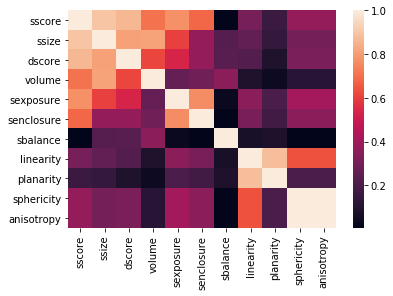

In [28]:
# queste sono quelle autocalcolate 
#        linearity 
#        planarity
#        sphericity 
#        anisotropy 

import seaborn as sns

corr = data.corr().abs()

s = corr.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

for s in so.index:
    if so[s] < 1.0 and so[s] > 0.7:
        print (s, so[s])

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



In [17]:

first = {}
N = 200

for cname in data.columns:
    if cname != "name":
       first[cname] = data.sort_values(by=[cname], ascending=False).head(N)

print("Looking for ", snapselected)
    
for k in first:
    d =first[k]
    for name in d["name"]:
        if name.find(snapselected) > 0:
            print(name, " in ", k)


Looking for  4204
e200k_4204.jrun_site_2  in  sscore
e200k_4204.jrun_site_2  in  dscore
e200k_4204.jrun_site_2  in  senclosure


In [31]:
N = 10
print(first["sscore"].sort_values(by=["anisotropy"], ascending=False).head(N))

                         name   sscore  ssize   dscore     volume  sexposure  \
15249  e200k_4922.jrun_site_1  0.93995    118  0.93973  289.19187    0.63580   
7511   e200k_4932.jrun_site_1  0.92976     98  0.88809  238.59938    0.64364   
19287  e200k_4898.jrun_site_1  0.95366    110  0.95013  259.82250    0.60854   
17245  e200k_4911.jrun_site_1  0.93473     93  0.87798  266.55388    0.66058   
17342  e200k_4970.jrun_site_1  0.93508    118  0.93668  288.97750    0.63009   
18640  e200k_5189.jrun_site_1  0.93834    115  0.93395  314.78825    0.62171   
1522   e200k_5157.jrun_site_1  0.92995     92  0.88344  250.73300    0.62602   
9441   e200k_5153.jrun_site_1  0.93034     90  0.89708  266.21087    0.61373   
17740  e200k_5161.jrun_site_1  0.96475     97  0.92329  291.42138    0.61355   
15447  e200k_5141.jrun_site_1  0.94050    101  0.94022  264.79600    0.64311   

       senclosure  sbalance  linearity  planarity  sphericity  anisotropy  
15249     0.60820   0.26991    0.97212    0